In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob

In [30]:
#Bernard Specs
Bernard_ForeWing_Length=19 #mm
Bernard_Body_Length=17.0 #mm
Bernard_Body_Width= 5.1 #mm
Bernard_Body_Height= 4.75 #mm

Full_Bernard_Volume=0.301 #cm^3
Body_Only_Bernard_Volume=0.1582 #cm^3
Shaved_Bernard_Volume= 0.1515#

In [31]:
#Spheriod Settings
a=Bernard_Body_Length/2
b_over_a=np.round((Bernard_Body_Width/2)/a,3)  # y axis
c_over_a=np.round(ellipse_c(Bernard_Body_Length/2,Bernard_Body_Width/2,Body_Only_Bernard_Volume*1000)/(Bernard_Body_Length/2),3)  #z. axis
print(a)
print(b_over_a)
print(c_over_a)

8.5
0.3
0.205


In [32]:
def h(m, d, l, w):
    height=(6*m)/(np.pi*d*l*w)
    return height

In [33]:
def ellipse_volume(a,b,c):
    V=4/3*np.pi*a*b*c
    return V

def ellipse_c(a,b,V):
    c=V/(4/3*np.pi*a*b)
    return c

In [34]:
print(ellipse_volume(Bernard_Body_Length/2,Bernard_Body_Width/2,Bernard_Body_Height/2)*0.001)

0.2156310657607694


In [35]:
height=h(Body_Only_Bernard_Volume_BBG_mass, BBG_dens, Bernard_Body_Length, Bernard_Body_Width)
print(height)

NameError: name 'Body_Only_Bernard_Volume_BBG_mass' is not defined

In [36]:
#Bernard Mass Estimates
Full_Bernard_Volume_BBG_mass=Full_Bernard_Volume*BBG_dens*1000 # converted to mg
Body_Only_Bernard_Volume_BBG_mass=Body_Only_Bernard_Volume*BBG_dens*1000 # converted to mg

In [37]:
#E&M Properties
BBG_perm=34.3-18.6j  # Permittvity; Mirkovic et al. 2018 based on Nelson et al. 1998
BBG_dens=1.26  #g/cm^3density; Mirkovic et al. 2018 based on Nelson et al. 1998

def water_epsilon(t):
    water_epsilon=87.740-0.40008*t+9.398*10**(-4)*t**2-1.410*10**(-6)*t**3
    return water_epsilon
    #Equation from Malmberg and Maryott 1956

water_epsilon(25)

78.30334375

In [38]:
def dBsc_to_linear_meter_squared(dBsc_number):
    linear_square_centimeter=10**(dBsc_number/10)
    linear_square_meter=linear_square_centimeter*0.0001
    return linear_square_meter

In [39]:
def dBsm_to_linear_meter_squared(dBsm_number):
    linear_square_meter=10**(dBsm_number/10)
    return linear_square_meter

In [40]:
def dBsm_to_dBsc(dBsm_number):
    linear_square_meter=dBsm_to_linear_meter_squared(dBsm_number)
    linear_square_centimeter=linear_square_meter*10000
    dBsc=10*np.log10(linear_square_centimeter)
    return dBsc

In [41]:
def linear_meter_squared_to_dBsc(linear_meter_squared_number):
    linear_square_centimeter=linear_meter_squared*10000
    dBsc=10*np.log10(linear_square_centimeter)
    return dBsc

In [42]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [43]:
def wipl_radiation_output_reader(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
          
    if len(path_to_file.split('/')[-1].split('_'))==8:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7].split('.')[0],
                  'WingDomain' : 'NA'
                  }
    elif len(path_to_file.split('/')[-1].split('_'))==9:
        ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
                  'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
                  'BodyType' : path_to_file.split('/')[-1].split('_')[2],
                  'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
                  'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
                  'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
                  'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
                  'InternalDomain' : path_to_file.split('/')[-1].split('_')[7],
                  'WingDomain' : path_to_file.split('/')[-1].split('_')[8].split('.')[0]
                  }
    
    
    return ra1_df, ra1_dict

In [44]:
def wipl_radiation_output_reader_ellipsoid(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
    ra1_dict={'Ellipsoid' : path_to_file.split('/')[-1].split('_')[0],
              'BugType' : path_to_file.split('/')[-1].split('_')[1], 
              'Specimen_Number' : int(path_to_file.split('/')[-1].split('_')[2]),
              'BodyType' : path_to_file.split('/')[-1].split('_')[3],
              'Scale' : int(path_to_file.split('/')[-1].split('_')[4])/10,
              'Frequency' : int(path_to_file.split('/')[-1].split('_')[5])/10,
              'Internal Domain' : path_to_file.split('/')[-1].split('_')[6],
              'Number of Plates' : int(path_to_file.split('/')[-1].split('_')[7])
              },
    return ra1_df, ra1_dict

In [45]:
#data_dir='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Insect/'
data_dir='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Insect/Roman/ra1_files/Test/'
files=glob(data_dir+'*0250*.ra1')
files.sort()

radiation_data=[]
radiation_metadata=[]
for f in files:
    file_name=f.split('/')[-1].split('.')[0]
    print(file_name)
    (ra1_df, ra1_dict)= wipl_radiation_output_reader(f)
    radiation_data.append(ra1_df)
    radiation_metadata.append(ra1_dict)

In [46]:
ellip_dir='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/'

ellipsoid_files=[
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLGB_20_e1.ra1',
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_20_e1_LYUW.ra1',
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLBG_20_e1_NewV.ra1',
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkWater_20_e1.ra1',
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkWater_20_e1_LYUW.ra1',
    ellip_dir+'Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkWater_20_e1_NewV.ra1',]
    
ellipsoid_radiation_data=[]
ellipsoid_radiation_metadata=[]
for f in ellipsoid_files:
    file_name=f.split('/')[-1].split('.')[0]
    (ellipsoid_ra1_df, ellipsoid_ra1_dict)= wipl_radiation_output_reader_ellipsoid(f)
    ellipsoid_radiation_data.append(ellipsoid_ra1_df)
    ellipsoid_radiation_metadata.append(ellipsoid_ra1_dict)  


FileNotFoundError: [Errno 2] File b'/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLGB_20_e1.ra1' does not exist: b'/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Ellipsoid/Ellipsoid_LepidopteraNoctuidaeMoth_12_BodyOnly_1000_94_MirkLGB_20_e1.ra1'

In [47]:
data_dir='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/WP1b - Electromagnetic simulations/WiPL_Results/Moth_Full_Sep19/Insect/0031_25_scaling/'
files=glob(data_dir+'*.ra1')
files.sort()

scaling_31_radiation_data=[]
scaling_31_radiation_metadata=[]
for f in files:
    file_name=f.split('/')[-1].split('.')[0]
    print(file_name)
    (ra1_df, ra1_dict)= wipl_radiation_output_reader(f)
    scaling_31_radiation_data.append(ra1_df)
    scaling_31_radiation_metadata.append(ra1_dict)

In [20]:
clpp_file="/Users/rrniii/Google_Drive/code/PycharmProjects/biodar/data/Drakeetal2017/tres_a_1320453_sm7338.xlsx"

In [21]:
sxx_syy_file="/Users/rrniii/Google_Drive/code/PycharmProjects/biodar/data/Drakeetal2017/tres_a_1320453_sm7373.xlsx"

In [22]:
Tom_forewing_length_compilation_file='/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Noctuid FW lengths.xlsx'

In [23]:
clpp_raw_df = pd.read_excel(clpp_file, header=9, usecols="B:AA",skiprows=0,skipfooter=30, sheet_name='CLPP')
sxx_syy_raw_df = pd.read_excel(sxx_syy_file, header=9, usecols="B:O",skiprows=0,skipfooter=25, sheet_name='sxx,syy')
clpp_data_df=(clpp_raw_df[4:160]).reset_index(drop=True)
sxx_syy_data_df=(sxx_syy_raw_df[4:82]).reset_index(drop=True)

In [24]:
clpp_data_df_noctuid_moths_df=(clpp_data_df[clpp_data_df['Order - group within order'].str.contains("Lep - noctuid moth")]).reset_index(drop=True)

In [25]:
clpp_data_df_noctuid_moths_df.columns

Index(['Species', 'Species.1', 'Order - group within order', 'Species.2',
       'Species.3', 'Group', 'Source', 'Mass', 'Wing', 'Body', 'Body.1', 'sxx',
       'e (-ve)', 'b (e -ve)', 'e', 'b', 'q0', 'a0', 'a2', 'a4', 'a2.1',
       'a4.1', 'sxx/syy', 'a0.1', 'p', 'q'],
      dtype='object')

In [26]:
Tom_forewing_length_compilation_df = pd.read_excel(Tom_forewing_length_compilation_file, header=1, usecols="A:F",skiprows=0)

What does wing length mean?
Add in Tom data to give context

In [27]:
wipl_colours_marks=['r|','k.','b_','g.','y_','r|','gx','m_','c|','yx','m_','m|','m3','yx','y|','y+','y_','y1','y3','ys',]
ellipsoid_wipl_colours_marks=['ok','gP','bD','.k','g+','bd']
ellipsoid_Names=['Original','Drake','New Measurements', 'Original Water','Drake Water','New Measurements Water']
ellipsoid_Mass=[Body_Only_Bernard_Volume_BBG_mass,133,Body_Only_Bernard_Volume_BBG_mass,Body_Only_Bernard_Volume_BBG_mass,133,Body_Only_Bernard_Volume_BBG_mass]
ellipsoid_Body_Length=[18.8,18.5,Bernard_Body_Length,18.8,18.5,Bernard_Body_Length]
ellipsoid_Body_Width=[5.72,4.5,Bernard_Body_Width,5.72,4.5,Bernard_Body_Width]
ellipsoid_ForeWing_Length=[Bernard_ForeWing_Length,17.5,Bernard_ForeWing_Length,Bernard_ForeWing_Length,17.5,Bernard_ForeWing_Length]
scaling_marks=['v','^','>','<','D','*','p','P', '8','d']

fig, axs = plt.subplots(4, 3, figsize=[30,25], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.suptitle("Lep - noctuid moth Morphology Decimation versus Scattering Parameters, Drake et al 2017", fontsize=24)
axs[0,0].scatter(clpp_data_df_noctuid_moths_df['sxx'],clpp_data_df_noctuid_moths_df['Mass'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,0].plot(max(r),Body_Only_Bernard_Volume_BBG_mass,wipl_colours_marks[idx],markersize=14,label=str(radiation_metadata[idx]['InternalDomain'])+' '+str(radiation_metadata[idx]['WingDomain'])+' '+str(radiation_metadata[idx]['BodyType'])+' Decimation: '+str(radiation_metadata[idx]['Resolution']))

for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[0,0].plot(max(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label=str(scaling_31_radiation_metadata[idx][0]['BodyType'])+' Scaling: '+str(scaling_31_radiation_metadata[idx][0]['Scale']))
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[0,0].plot(max(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label=str(scaling_31_radiation_metadata[idx][0]['BodyType'])+' Scaling: '+str(scaling_31_radiation_metadata[idx][0]['Scale']))
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[0,0].plot(max(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label=str(scaling_31_radiation_metadata[idx][0]['BodyType'])+' Scaling: '+str(scaling_31_radiation_metadata[idx][0]['Scale']))
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[0,0].plot(max(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label=str(scaling_31_radiation_metadata[idx][0]['BodyType'])+' Scaling: '+str(scaling_31_radiation_metadata[idx][0]['Scale']))
        
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[0,0].plot(max(ellipsoid_r),ellipsoid_Mass[idx],ellipsoid_wipl_colours_marks[idx],label=str('Ellipsoid '+str(ellipsoid_Names[idx])))
axs[0,0].set(xlabel='', ylabel='Mass (mg)')


axs[0,1].scatter(clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],clpp_data_df_noctuid_moths_df['Mass'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,1].plot(min(r),Body_Only_Bernard_Volume_BBG_mass,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[0,1].plot(min(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[0,1].plot(min(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[0,1].plot(min(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[0,1].plot(min(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')  
        
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[0,1].plot(min(ellipsoid_r),ellipsoid_Mass[idx], ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

    
axs[0,2].scatter(clpp_data_df_noctuid_moths_df['sxx/syy'], clpp_data_df_noctuid_moths_df['Mass'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,2].plot(max(r)/min(r),Body_Only_Bernard_Volume_BBG_mass,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[0,2].plot(max(r)/min(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[0,2].plot(max(r)/min(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[0,2].plot(max(r)/min(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[0,2].plot(max(r)/min(r),Body_Only_Bernard_Volume_BBG_mass*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')     
        
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[0,2].plot(max(ellipsoid_r)/min(ellipsoid_r),ellipsoid_Mass[idx], ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

    
axs[1,0].scatter(clpp_data_df_noctuid_moths_df['sxx'],clpp_data_df_noctuid_moths_df['Body'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,0].plot(max(r),Bernard_Body_Length,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[1,0].plot(max(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[1,0].plot(max(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[1,0].plot(max(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[1,0].plot(max(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')

#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[1,0].plot(max(ellipsoid_r),ellipsoid_Body_Length[idx],ellipsoid_wipl_colours_marks[idx],label='_nolegend_')
axs[1,0].set(xlabel='', ylabel='Body Length (mm)')

axs[1,1].scatter(clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],clpp_data_df_noctuid_moths_df['Body'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,1].plot(min(r),Bernard_Body_Length,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[1,1].plot(min(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[1,1].plot(min(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[1,1].plot(min(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[1,1].plot(min(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')  
        
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[1,1].plot(min(ellipsoid_r),ellipsoid_Body_Length[idx],ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[1,2].scatter(clpp_data_df_noctuid_moths_df['sxx/syy'], clpp_data_df_noctuid_moths_df['Body'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,2].plot(max(r)/min(r),Bernard_Body_Length,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[1,2].plot(max(r)/min(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[1,2].plot(max(r)/min(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[1,2].plot(max(r)/min(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[1,2].plot(max(r)/min(r),Bernard_Body_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')     
    
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[1,2].plot(max(ellipsoid_r)/min(ellipsoid_r),ellipsoid_Body_Length[idx],ellipsoid_wipl_colours_marks[idx],label='_nolegend_')
    
axs[2,0].scatter(clpp_data_df_noctuid_moths_df['sxx'],clpp_data_df_noctuid_moths_df['Body.1'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,0].plot(max(r),Bernard_Body_Width,wipl_colours_marks[idx],markersize=14,label='_nolegend_')

for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[2,0].plot(max(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[2,0].plot(max(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[2,0].plot(max(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[2,0].plot(max(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')
    
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[2,0].plot(max(ellipsoid_r),ellipsoid_Body_Width[idx], ellipsoid_wipl_colours_marks[idx],label='_nolegend_')
axs[2,0].set(xlabel='', ylabel='Body Width (mm)')

axs[2,1].scatter(clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],clpp_data_df_noctuid_moths_df['Body.1'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,1].plot(min(r),Bernard_Body_Width,wipl_colours_marks[idx],markersize=14,label='_nolegend_')
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[2,1].plot(min(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[2,1].plot(min(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[2,1].plot(min(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[2,1].plot(min(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')  
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,1].plot(min(ellipsoid_r),ellipsoid_Body_Width[idx],ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[2,2].scatter(clpp_data_df_noctuid_moths_df['sxx/syy'], clpp_data_df_noctuid_moths_df['Body.1'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,2].plot(max(r)/min(r),Bernard_Body_Width,wipl_colours_marks[idx],label='_nolegend_')

for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[2,2].plot(max(r)/min(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[2,2].plot(max(r)/min(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[2,2].plot(max(r)/min(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[2,2].plot(max(r)/min(r),Bernard_Body_Width*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')     
    
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[2,2].plot(max(ellipsoid_r)/min(ellipsoid_r),ellipsoid_Body_Width[idx],ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[3,0].scatter(clpp_data_df_noctuid_moths_df['sxx'],clpp_data_df_noctuid_moths_df['Wing'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[3,0].plot(max(r),Bernard_ForeWing_Length,wipl_colours_marks[idx],label='_nolegend_')
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[3,0].plot(max(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[3,0].plot(max(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[3,0].plot(max(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[3,0].plot(max(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[3,0].plot(max(ellipsoid_r),ellipsoid_ForeWing_Length[idx],ellipsoid_wipl_colours_marks[idx],label='_nolegend_')
axs[3,0].set(xlabel=r'$\sigma_{xx}$', ylabel='Wing Length (mm)')

axs[3,1].scatter(clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],clpp_data_df_noctuid_moths_df['Wing'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[3,1].plot(min(r),Bernard_ForeWing_Length,wipl_colours_marks[idx],label='_nolegend_')
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[3,1].plot(min(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[3,1].plot(min(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[3,1].plot(min(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[3,1].plot(min(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')  
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[3,1].plot(min(ellipsoid_r),ellipsoid_ForeWing_Length[idx],ellipsoid_wipl_colours_marks[idx],label='_nolegend_')
axs[3,1].set(xlabel=r'$\sigma_{yy}$')


axs[3,2].scatter(clpp_data_df_noctuid_moths_df['sxx/syy'], clpp_data_df_noctuid_moths_df['Wing'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[3,2].plot(max(r)/min(r),Bernard_ForeWing_Length,wipl_colours_marks[idx],label='_nolegend_')
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[3,2].plot(max(r)/min(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[3,2].plot(max(r)/min(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[3,2].plot(max(r)/min(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[3,2].plot(max(r)/min(r),Bernard_ForeWing_Length*scale_factor,scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')     
    
#for idx, val in enumerate(ellipsoid_radiation_data):
#    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
#    axs[3,2].plot(max(ellipsoid_r)/min(ellipsoid_r),ellipsoid_ForeWing_Length[idx],ellipsoid_wipl_colours_marks[idx],label='_nolegend_')
axs[3,2].set(xlabel=r'$\frac{\sigma_{xx}}{\sigma_{yy}}$')


l=fig.legend(    # The line objects
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="WiPL Models"  # Title for the legend
           )
    
for ax in fig.get_axes():
    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')

plt.subplots_adjust(right=0.85)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

NameError: name 'Body_Only_Bernard_Volume_BBG_mass' is not defined

In [28]:
wipl_colours_marks=['rx','r|','r+','r_','r1','r3','rs','mx','m|','m+','m_','m1','m3','yx','y|','y+','y_','y1','y3','ys',]
ellipsoid_wipl_colours_marks=['ok','gP','bD','.k','g+','bd']
ellipsoid_Names=['Original','Drake','New Measurements', 'Original Water','Drake Water','New Measurements Water']
ellipsoid_Mass=[Body_Only_Bernard_Volume_BBG_mass,133,Body_Only_Bernard_Volume_BBG_mass,Body_Only_Bernard_Volume_BBG_mass,133,Body_Only_Bernard_Volume_BBG_mass]
ellipsoid_Body_Length=[18.8,18.5,Bernard_Body_Length,18.8,18.5,Bernard_Body_Length]
ellipsoid_Body_Width=[5.72,4.5,Bernard_Body_Width,5.72,4.5,Bernard_Body_Width]
ellipsoid_ForeWing_Length=[Bernard_ForeWing_Length,17.5,Bernard_ForeWing_Length,Bernard_ForeWing_Length,17.5,Bernard_ForeWing_Length]
scaling_marks=['v','^','>','<','D','*','p','P', '8','d']

fig, axs = plt.subplots(3,4, figsize=[30,25], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.suptitle("Lep - noctuid moth Morphology Decimation versus Scattering Parameters, Drake et al 2017", fontsize=24)
axs[0,0].scatter(clpp_data_df_noctuid_moths_df['Mass'],clpp_data_df_noctuid_moths_df['sxx'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,0].plot(Body_Only_Bernard_Volume_BBG_mass,max(r),wipl_colours_marks[idx],label=str(radiation_metadata[idx][0]['BodyType'])+' Decimation: '+str(radiation_metadata[idx][0]['Resolution']))

for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[0,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'r',label=str(scaling_31_radiation_metadata[idx][0]['BodyType'])+' Scaling: '+str(scaling_31_radiation_metadata[idx][0]['Scale']))
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[0,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'m',label=str(scaling_31_radiation_metadata[idx][0]['BodyType'])+' Scaling: '+str(scaling_31_radiation_metadata[idx][0]['Scale']))
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[0,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'y',label=str(scaling_31_radiation_metadata[idx][0]['BodyType'])+' Scaling: '+str(scaling_31_radiation_metadata[idx][0]['Scale']))
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[0,0].plot(Full_Bernard_Volume_BBG_mass*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'k',label=str(scaling_31_radiation_metadata[idx][0]['BodyType'])+' Scaling: '+str(scaling_31_radiation_metadata[idx][0]['Scale']))
        
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,0].plot(ellipsoid_Mass[idx],max(ellipsoid_r), ellipsoid_wipl_colours_marks[idx],label=str('Ellipsoid '+str(ellipsoid_Names[idx])))

axs[1,0].scatter(clpp_data_df_noctuid_moths_df['Mass'],clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,0].plot(Body_Only_Bernard_Volume_BBG_mass,min(r),wipl_colours_marks[idx],label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[1,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[1,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[1,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[1,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')  
        
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,0].plot(ellipsoid_Mass[idx], min(ellipsoid_r), ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

    
axs[2,0].scatter(clpp_data_df_noctuid_moths_df['Mass'],clpp_data_df_noctuid_moths_df['sxx/syy'], label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,0].plot(Body_Only_Bernard_Volume_BBG_mass,max(r)/min(r),wipl_colours_marks[idx],label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[2,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[2,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[2,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[2,0].plot(Body_Only_Bernard_Volume_BBG_mass*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')     
        
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,0].plot(ellipsoid_Mass[idx],max(ellipsoid_r)/min(ellipsoid_r), ellipsoid_wipl_colours_marks[idx],label='_nolegend_')
    
    
axs[0,1].scatter(clpp_data_df_noctuid_moths_df['Body'],clpp_data_df_noctuid_moths_df['sxx'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,1].plot(Bernard_Body_Length,max(r),wipl_colours_marks[idx],label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[0,1].plot(Bernard_Body_Length*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[0,1].plot(Bernard_Body_Length*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[0,1].plot(Bernard_Body_Length*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[0,1].plot(Bernard_Body_Length*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')

for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,1].plot(ellipsoid_Body_Length[idx],max(ellipsoid_r),ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[1,1].scatter(clpp_data_df_noctuid_moths_df['Body'],clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,1].plot(Bernard_Body_Length,min(r),wipl_colours_marks[idx],label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[1,1].plot(Bernard_Body_Length*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[1,1].plot(Bernard_Body_Length*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[1,1].plot(Bernard_Body_Length*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[1,1].plot(Bernard_Body_Length*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')  
        
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,1].plot(ellipsoid_Body_Length[idx],min(ellipsoid_r),ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[2,1].scatter( clpp_data_df_noctuid_moths_df['Body'],clpp_data_df_noctuid_moths_df['sxx/syy'], label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,1].plot(Bernard_Body_Length,max(r)/min(r),wipl_colours_marks[idx],label='_nolegend_')
    
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[2,1].plot(Bernard_Body_Length*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[2,1].plot(Bernard_Body_Length*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[2,1].plot(Bernard_Body_Length*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[2,1].plot(Bernard_Body_Length*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')     
    
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,1].plot(ellipsoid_Body_Length[idx],max(ellipsoid_r)/min(ellipsoid_r),ellipsoid_wipl_colours_marks[idx],label='_nolegend_')
    
axs[0,2].scatter(clpp_data_df_noctuid_moths_df['Body.1'],clpp_data_df_noctuid_moths_df['sxx'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,2].plot(Bernard_Body_Width,max(r),wipl_colours_marks[idx],label='_nolegend_')

for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[0,2].plot(Bernard_Body_Width*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[0,2].plot(Bernard_Body_Width*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[0,2].plot(Bernard_Body_Width*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[0,2].plot(Bernard_Body_Width*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')
    
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,2].plot(ellipsoid_Body_Width[idx],max(ellipsoid_r), ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[1,2].scatter(clpp_data_df_noctuid_moths_df['Body.1'],clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,2].plot(Bernard_Body_Width,min(r),wipl_colours_marks[idx],label='_nolegend_')
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[1,2].plot(Bernard_Body_Width*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[1,2].plot(Bernard_Body_Width*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[1,2].plot(Bernard_Body_Width*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[1,2].plot(Bernard_Body_Width*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')  
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,2].plot(ellipsoid_Body_Width[idx],min(ellipsoid_r),ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[2,2].scatter( clpp_data_df_noctuid_moths_df['Body.1'],clpp_data_df_noctuid_moths_df['sxx/syy'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,2].plot(Bernard_Body_Width,max(r)/min(r), wipl_colours_marks[idx],label='_nolegend_')

for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[2,2].plot(Bernard_Body_Width*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[2,2].plot(Bernard_Body_Width*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[2,2].plot(Bernard_Body_Width*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[2,2].plot(Bernard_Body_Width*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')     
    
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,2].plot(ellipsoid_Body_Width[idx],max(ellipsoid_r)/min(ellipsoid_r),ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[0,3].scatter(clpp_data_df_noctuid_moths_df['Wing'],clpp_data_df_noctuid_moths_df['sxx'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,3].plot(Bernard_ForeWing_Length,max(r),wipl_colours_marks[idx],label='_nolegend_')
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[0,3].plot(Bernard_ForeWing_Length*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[0,3].plot(Bernard_ForeWing_Length*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[0,3].plot(Bernard_ForeWing_Length*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[0,3].plot(Bernard_ForeWing_Length*scale_factor,max(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[0,3].plot(ellipsoid_ForeWing_Length[idx],max(ellipsoid_r),ellipsoid_wipl_colours_marks[idx],label='_nolegend_')

axs[1,3].scatter(clpp_data_df_noctuid_moths_df['Wing'],clpp_data_df_noctuid_moths_df['sxx']*1/clpp_data_df_noctuid_moths_df['sxx/syy'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,3].plot(Bernard_ForeWing_Length,min(r),wipl_colours_marks[idx],label='_nolegend_')
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[1,3].plot(Bernard_ForeWing_Length*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[1,3].plot(Bernard_ForeWing_Length*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[1,3].plot(Bernard_ForeWing_Length*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[1,3].plot(Bernard_ForeWing_Length*scale_factor,min(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')  
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[1,3].plot(ellipsoid_ForeWing_Length[idx],min(ellipsoid_r),ellipsoid_wipl_colours_marks[idx],label='_nolegend_')


axs[2,3].scatter( clpp_data_df_noctuid_moths_df['Wing'],clpp_data_df_noctuid_moths_df['sxx/syy'],label='_nolegend_')
for idx, val in enumerate(radiation_data):
    r=radiation_data[idx]['RCS'].loc[radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,3].plot(Bernard_ForeWing_Length,max(r)/min(r),wipl_colours_marks[idx],label='_nolegend_')
for idx, val in enumerate(scaling_31_radiation_data):
    r=scaling_31_radiation_data[idx]['RCS'].loc[scaling_31_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    scale_factor=scaling_31_radiation_metadata[idx][0]['Scale']/100
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='Full':
        axs[2,3].plot(Bernard_ForeWing_Length*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'r',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='NoWings':
        axs[2,3].plot(Bernard_ForeWing_Length*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'m',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['BodyType']=='OnlyBody':
        axs[2,3].plot(Bernard_ForeWing_Length*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'y',label='_nolegend_')
    if scaling_31_radiation_metadata[idx][0]['Scale']/100==1:
        axs[2,3].plot(Bernard_ForeWing_Length*scale_factor,max(r)/min(r),scaling_marks[np.remainder(idx,10)]+'k',label='_nolegend_')     
    
for idx, val in enumerate(ellipsoid_radiation_data):
    ellipsoid_r= ellipsoid_radiation_data[idx]['RCS'].loc[ ellipsoid_radiation_data[idx]['theta'] == -90.0]*(freq_to_lambda(9.4)*100)**2
    axs[2,3].plot(ellipsoid_ForeWing_Length[idx],max(ellipsoid_r)/min(ellipsoid_r),ellipsoid_wipl_colours_marks[idx],label='_nolegend_')



axs[0,0].set(ylabel=r'$\sigma_{xx}$')
axs[1,0].set(ylabel=r'$\sigma_{yy}$')
axs[2,0].set(ylabel=r'$\frac{\sigma_{xx}}{\sigma_{yy}}$')

axs[0,0].set(xlabel='Mass (mg)')
axs[0,1].set(xlabel='Body Length (mm)')
axs[0,2].set(xlabel='Body Width (mm)')
axs[0,3].set(xlabel='Wing Length (mm)')

axs[1,0].set(xlabel='Mass (mg)')
axs[1,1].set(xlabel='Body Length (mm)')
axs[1,2].set(xlabel='Body Width (mm)')
axs[1,3].set(xlabel='Wing Length (mm)')

axs[2,0].set(xlabel='Mass (mg)')
axs[2,1].set(xlabel='Body Length (mm)')
axs[2,2].set(xlabel='Body Width (mm)')
axs[2,3].set(xlabel='Wing Length (mm)')






l=fig.legend(    # The line objects
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="WiPL Models"  # Title for the legend
           )
    
for ax in fig.get_axes():
    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax.set_xscale('log')
    ax.set_yscale('log')

plt.subplots_adjust(right=0.85)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

NameError: name 'Body_Only_Bernard_Volume_BBG_mass' is not defined

/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


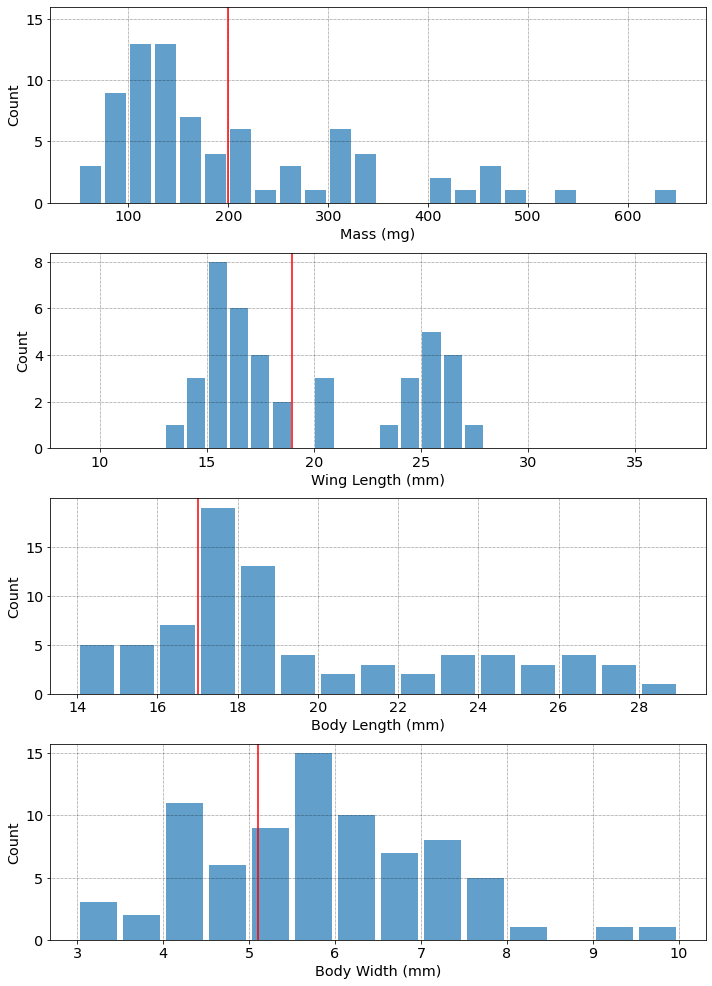

In [71]:
fig, axs = plt.subplots(4, 1, figsize=[10,15], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
#plt.suptitle("Lep - noctuid moth Morphology from Drake et al 2017 versus Bernard", fontsize=24)

n, bins, patches = axs[0].hist(x=pd.to_numeric(clpp_data_df_noctuid_moths_df['Mass']),range=[50,650], bins=24,alpha=0.7, rwidth=0.85, label='Drake et al. (2017)')
# axs[0].axvline(Full_Bernard_Volume_BBG_mass,ymin=0,ymax=1000, c='r',linestyle='--', label='Full Bernard BBG')
axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass,ymin=0,ymax=1000, c='r', label='Body Only Bernard BBG')
axs[0].set(xlabel='Mass (mg)', ylabel='Count')
axs[0].set_ylim([0,16])
# axs[0].legend(loc='upper right', borderaxespad=0.2)

# axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass*0.50,ymin=0,ymax=1000, c='g', label='50% Bernard')
# axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass*0.625,ymin=0,ymax=1000, c='k', label='62.5% Bernard')
# axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass*0.75,ymin=0,ymax=1000, c='tab:orange', label='75% Bernard')
# axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass*0.875,ymin=0,ymax=1000, c='y', label='87.5% Bernard')
# axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass*1.125,ymin=0,ymax=1000, c='m', label='112.5% Bernard')
# axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass*1.25,ymin=0,ymax=1000, c='tab:pink', label='125% Bernard')
# axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass*1.375,ymin=0,ymax=1000, c='tab:purple', label='137.5% Bernard')
# axs[0].axvline(Body_Only_Bernard_Volume_BBG_mass*1.50,ymin=0,ymax=1000, c='b', label='150% Bernard')


n, bins, patches = axs[1].hist(x=pd.to_numeric(clpp_data_df_noctuid_moths_df['Wing']),range=[9,37], bins=28 ,alpha=0.7, rwidth=0.85, label='Drake et al. (2017)')
axs[1].set(xlabel='Wing Length (mm)', ylabel='Count')
axs[1].axvline(Bernard_ForeWing_Length,ymin=0,ymax=1000, c='r', label='Bernard')
# axs[1].legend(loc='upper right', borderaxespad=0.2)

# axs[1].axvline(Bernard_ForeWing_Length*0.50,ymin=0,ymax=1000, c='g', label='50% Bernard')
# axs[1].axvline(Bernard_ForeWing_Length*0.625,ymin=0,ymax=1000, c='k', label='62.5% Bernard')
# axs[1].axvline(Bernard_ForeWing_Length*0.75,ymin=0,ymax=1000, c='tab:orange', label='75% Bernard')
# axs[1].axvline(Bernard_ForeWing_Length*0.875,ymin=0,ymax=1000, c='y', label='87.5% Bernard')
# axs[1].axvline(Bernard_ForeWing_Length*1.125,ymin=0,ymax=1000, c='m', label='112.5% Bernard')
# axs[1].axvline(Bernard_ForeWing_Length*1.25,ymin=0,ymax=1000, c='tab:pink', label='125% Bernard')
# axs[1].axvline(Bernard_ForeWing_Length*1.375,ymin=0,ymax=1000, c='tab:purple', label='137.5% Bernard')
# axs[1].axvline(Bernard_ForeWing_Length*1.50,ymin=0,ymax=1000, c='b', label='150% Bernard')



n, bins, patches = axs[2].hist(x=pd.to_numeric(clpp_data_df_noctuid_moths_df['Body']),range=[14,29], bins=15,alpha=0.7, rwidth=0.85, label='Drake et al. (2017)')
axs[2].set(xlabel='Body Length (mm)', ylabel='Count')
axs[2].axvline(Bernard_Body_Length,ymin=0,ymax=1000, c='r', label='Bernard')
# axs[2].legend(loc='upper right', borderaxespad=0.2)
# axs[2].axvline(Bernard_Body_Length*0.50,ymin=0,ymax=1000, c='g', label='50% Bernard')
# axs[2].axvline(Bernard_Body_Length*0.625,ymin=0,ymax=1000, c='k', label='62.5% Bernard')
# axs[2].axvline(Bernard_Body_Length*0.75,ymin=0,ymax=1000, c='tab:orange', label='75% Bernard')
# axs[2].axvline(Bernard_Body_Length*0.875,ymin=0,ymax=1000, c='y', label='87.5% Bernard')
# axs[2].axvline(Bernard_Body_Length*1.125,ymin=0,ymax=1000, c='m', label='112.5% Bernard')
# axs[2].axvline(Bernard_Body_Length*1.25,ymin=0,ymax=1000, c='tab:pink', label='125% Bernard')
# axs[2].axvline(Bernard_Body_Length*1.375,ymin=0,ymax=1000, c='tab:purple', label='137.5% Bernard')
# axs[2].axvline(Bernard_Body_Length*1.50,ymin=0,ymax=1000, c='b', label='150% Bernard')


n, bins, patches = axs[3].hist(x=pd.to_numeric(clpp_data_df_noctuid_moths_df['Body.1']),range=[3,10], bins=14 ,alpha=0.7, rwidth=0.85, label='Drake et al. (2017)')
axs[3].set(xlabel='Body Width (mm)', ylabel='Count')
axs[3].axvline(Bernard_Body_Width,ymin=0,ymax=1000, c='r', label='Bernard')
# axs[3].legend(loc='upper right', borderaxespad=0.2)
# axs[3].axvline(Bernard_Body_Width*0.50,ymin=0,ymax=1000, c='g', label='50% Bernard')
# axs[3].axvline(Bernard_Body_Width*0.625,ymin=0,ymax=1000, c='k', label='62.5% Bernard')
# axs[3].axvline(Bernard_Body_Width*0.75,ymin=0,ymax=1000, c='tab:orange', label='75% Bernard')
# axs[3].axvline(Bernard_Body_Width*0.875,ymin=0,ymax=1000, c='y', label='87.5% Bernard')
# axs[3].axvline(Bernard_Body_Width*1.125,ymin=0,ymax=1000, c='m', label='112.5% Bernard')
# axs[3].axvline(Bernard_Body_Width*1.25,ymin=0,ymax=1000, c='tab:pink', label='125% Bernard')
# axs[3].axvline(Bernard_Body_Width*1.375,ymin=0,ymax=1000, c='tab:purple', label='137.5% Bernard')
# axs[3].axvline(Bernard_Body_Width*1.50,ymin=0,ymax=1000, c='b', label='150% Bernard')


for ax in fig.get_axes():
    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

plt.savefig('/Users/rrniii/University of Leeds/Christopher Hassall - BioDAR Project Folder/WP1 - Electromagnetic (EM) modelling/Bernard_Paper/Images/Figure4.svg', format='svg', dpi=1200)


In [97]:
x=pd.to_numeric(clpp_data_df_noctuid_moths_df['Mass'])
print(x.min())
print(x.max())

53
648


In [98]:
x=pd.to_numeric(Tom_forewing_length_compilation_df['Upper FW length (mm)'])
print(x.min())
print(x.max())
print(x.max()-x.min())

9.0
36.0
27.0


/Users/rrniii/anaconda3/envs/biodar/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


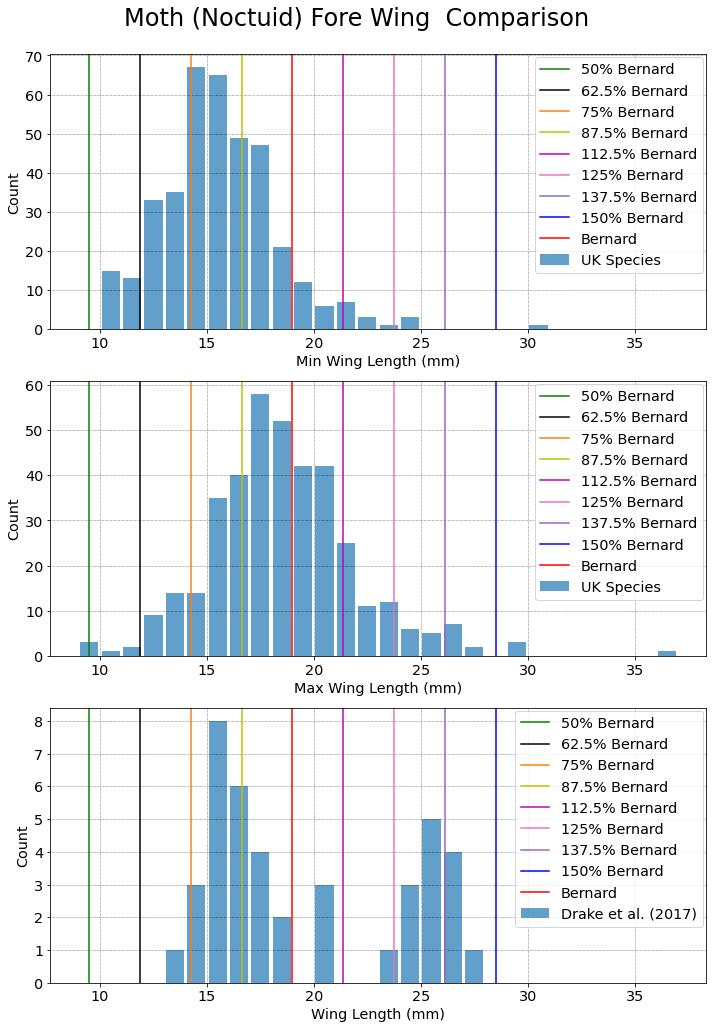

In [99]:



fig, axs = plt.subplots(3, 1, figsize=[10,15], facecolor='white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.suptitle("Moth (Noctuid) Fore Wing  Comparison", fontsize=24)

for i in [0,1,2]:
    axs[i].axvline(Bernard_ForeWing_Length*0.50,ymin=0,ymax=1000, c='g', label='50% Bernard')
    axs[i].axvline(Bernard_ForeWing_Length*0.625,ymin=0,ymax=1000, c='k', label='62.5% Bernard')
    axs[i].axvline(Bernard_ForeWing_Length*0.75,ymin=0,ymax=1000, c='tab:orange', label='75% Bernard')
    axs[i].axvline(Bernard_ForeWing_Length*0.875,ymin=0,ymax=1000, c='y', label='87.5% Bernard')
    axs[i].axvline(Bernard_ForeWing_Length*1.125,ymin=0,ymax=1000, c='m', label='112.5% Bernard')
    axs[i].axvline(Bernard_ForeWing_Length*1.25,ymin=0,ymax=1000, c='tab:pink', label='125% Bernard')
    axs[i].axvline(Bernard_ForeWing_Length*1.375,ymin=0,ymax=1000, c='tab:purple', label='137.5% Bernard')
    axs[i].axvline(Bernard_ForeWing_Length*1.50,ymin=0,ymax=1000, c='b', label='150% Bernard')

n, bins, patches = axs[0].hist(x=pd.to_numeric(Tom_forewing_length_compilation_df['Lower FW length (mm)']),range=[9,37], bins=28,alpha=0.7, rwidth=0.85, label='UK Species')
axs[0].set(xlabel='Min Wing Length (mm)', ylabel='Count')
axs[0].axvline(Bernard_ForeWing_Length,ymin=0,ymax=1000, c='r', label='Bernard')
axs[0].legend(loc='upper right', borderaxespad=0.2)


n, bins, patches = axs[1].hist(x=pd.to_numeric(Tom_forewing_length_compilation_df['Upper FW length (mm)']),range=[9,37], bins=28,alpha=0.7, rwidth=0.85, label='UK Species')
axs[1].set(xlabel='Max Wing Length (mm)', ylabel='Count')
axs[1].axvline(Bernard_ForeWing_Length,ymin=0,ymax=1000, c='r', label='Bernard')
axs[1].legend(loc='upper right', borderaxespad=0.2)

n, bins, patches = axs[2].hist(x=pd.to_numeric(clpp_data_df_noctuid_moths_df['Wing']),range=[9,37], bins=28,alpha=0.7, rwidth=0.85, label='Drake et al. (2017)')
axs[2].set(xlabel='Wing Length (mm)', ylabel='Count')
axs[2].axvline(Bernard_ForeWing_Length,ymin=0,ymax=1000, c='r', label='Bernard')
axs[2].legend(loc='upper right', borderaxespad=0.2)




for ax in fig.get_axes():
    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

In [100]:
np.sqrt(2)

1.4142135623730951

In [101]:
Tom_forewing_length_compilation_df.columns

Index(['Subfamily', 'Genus', 'Species', 'Binomen', 'Lower FW length (mm)',
       'Upper FW length (mm)'],
      dtype='object')

In [102]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(clpp_data_df_noctuid_moths_df)

                    Species                        Species.1  \
0         Mesapamea secalis                    Common Rustic   
1           Noctua janthina      Langmaid's Yellow Underwing   
2           Noctua janthina      Langmaid's Yellow Underwing   
3        Ochropleura plecta                   Flame Shoulder   
4       Xestia xanthographa               Square-spot Rustic   
5       Xestia xanthographa               Square-spot Rustic   
6          Autographa gamma                         Silver-Y   
7          Autographa gamma                         Silver-Y   
8          Autographa gamma                         Silver-Y   
9    Amphipyra tragopoginis                       Mouse Moth   
10          Xestia c-nigrum       Setaceous Hebrew Character   
11             Noctua comes          Lesser Yellow Underwing   
12             Noctua comes          Lesser Yellow Underwing   
13    Agrotis exclamationis                    Hart and Dart   
14           Noctua pronuba           La

In [103]:
clpp_data_df_noctuid_moths_df[17:18]

,Species,Species.1,Order - group within order,Species.2,Species.3,Group,Source,Mass,Wing,Body,...,q0,a0,a2,a4,a2.1,a4.1,sxx/syy,a0.1,p,q
17,Noctua pronuba,Large Yellow Underwing,Lep - noctuid moth,MnLaYU,15,Mn,A,333,24.5,24.5,...,-3.1,2.72319,2.0744,0.214404,0.761755,0.078733,5.806358,4.350782,1,0.848683


In [104]:
clpp_data_df_noctuid_moths_df.loc[(clpp_data_df_noctuid_moths_df['Wing'] > 18.5) & (clpp_data_df_noctuid_moths_df['Wing'] < 19.5)]

,Species,Species.1,Order - group within order,Species.2,Species.3,Group,Source,Mass,Wing,Body,...,q0,a0,a2,a4,a2.1,a4.1,sxx/syy,a0.1,p,q
12,Noctua comes,Lesser Yellow Underwing,Lep - noctuid moth,MnLeYU,13,Mn,A,176,18.6,19.7,...,-2.2,1.62006,1.75019,0.379746,1.08032,0.234402,15.023136,2.095314,0.93044,1.27505


In [105]:
Bernard_ForeWing_Length=19 #mm
Bernard_Body_Length=17.0 #mm
Bernard_Body_Width= 5.1 #mm
Bernard_Body_Height= 4.75 #mm
Full_Bernard_Volume_BBG_mass=Full_Bernard_Volume*BBG_dens*1000 # converted to mg
print(Full_Bernard_Volume_BBG_mass)
Body_Only_Bernard_Volume_BBG_mass=Body_Only_Bernard_Volume*BBG_dens*1000 # converted to mg
print(Body_Only_Bernard_Volume_BBG_mass)

387.702
199.33200000000002


In [106]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(clpp_data_df_noctuid_moths_df.loc[(clpp_data_df_noctuid_moths_df['Species.1'] == 'Lesser Yellow Underwing')])

         Species                Species.1 Order - group within order  \
11  Noctua comes  Lesser Yellow Underwing         Lep - noctuid moth   
12  Noctua comes  Lesser Yellow Underwing         Lep - noctuid moth   
60  Noctua comes  Lesser Yellow Underwing         Lep - noctuid moth   
61  Noctua comes  Lesser Yellow Underwing         Lep - noctuid moth   

   Species.2 Species.3 Group Source Mass  Wing  Body Body.1     sxx e (-ve)  \
11    MnLeYU        13    Mn      A  133  17.5  18.5    4.5   3.587   0.237   
12    MnLeYU        13    Mn      A  176  18.6  19.7    4.9    3.75   0.258   
60    MnLeYU        13    Mn      S  222   NaN  18.9    6.3  2.3054  0.3973   
61    MnLeYU        13    Mn      S  324   NaN  21.3    6.6  3.6435  0.5228   

   b (e -ve)       e        b      q0       a0        a2        a4      a2.1  \
11      61.7   0.237     61.7     1.4  1.52144   1.69276  0.372802   1.11261   
12      60.2   0.258     60.2    -2.2  1.62006   1.75019  0.379746   1.08032   
60 